In [73]:
import sys
import os 

os.environ["CONFIG_PATHS"] = "../configs/self_play.yaml"
os.environ["CONFIG_OVERRIDES"] = 'game.moves_directory="../data/moves_10"'
sys.path.append("../src")

from display import Display
from neural_net import NeuralNet
import player_pov_helpers

from configuration import moves_data, config

In [108]:
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [109]:
Event = namedtuple('Event', [
    'timestamp',
    'name',
    'params',
]) 

def load_events(log_path):
    events = []
    with open(log_path) as f:
        logs = f.readlines()
        for line in logs:
            # Skip lines that are not events.
            if not line.startswith("event | "):
                continue

            _, timestamp, event, params = line.strip().split(" | ")
            events.append((float(timestamp), event, json.loads(params)))

    # Sort events by timestamp.
    events.sort(key=lambda x: x[0])

    # Adjust timestamps to start at 0.
    start_time = events[0][0]
    print(f"Start time: {start_time}")

    return [
        Event(
            timestamp=timestamp - start_time,
            name=event,
            params=params,
        )
        for timestamp, event, params in events
    ]

In [68]:
MOVES = moves_data()

In [5]:
# first move, by player 0: 2942
# second move, by player 1 recommended by the policy network: 2914 (in universal)

gamefile = np.load("../data/2024-11-20_17-29-54-solitude/games/1732155305827_22.npz")
occupancies = gamefile["occupancies"]
policies = gamefile["policies"]
values = gamefile["values"]

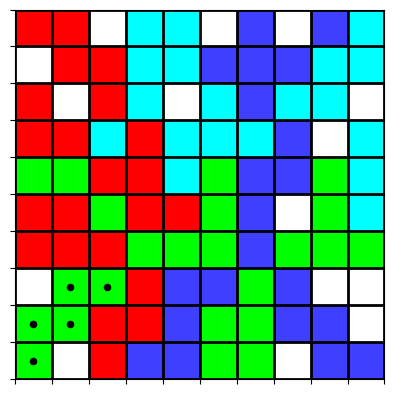

In [71]:
i = 21
player = i % 4

Display(
    occupancies[i], MOVES["new_occupieds"][2914]
).show()

In [62]:
np.argmax(policies[0])

np.int64(2942)

In [85]:
model = NeuralNet(config()["networks"]["default"])
model.load_state_dict(torch.load("../data/2024-11-20_17-29-54-solitude/models/2024-11-20_08-24-43_975055.pt", weights_only=True))

<All keys matched successfully>

In [89]:
model.eval()
values, policies = model(torch.Tensor(occupancies))

In [103]:
torch.softmax(values[0], dim=0)

tensor([0.4902, 0.1406, 0.3062, 0.0631], grad_fn=<SoftmaxBackward0>)

In [104]:
torch.argmax(policies[0])

tensor(2942)

In [114]:
events = 

Start time: 1732155183.77021


In [115]:
reports = [event for event in events if event.name == "mcts_report"]

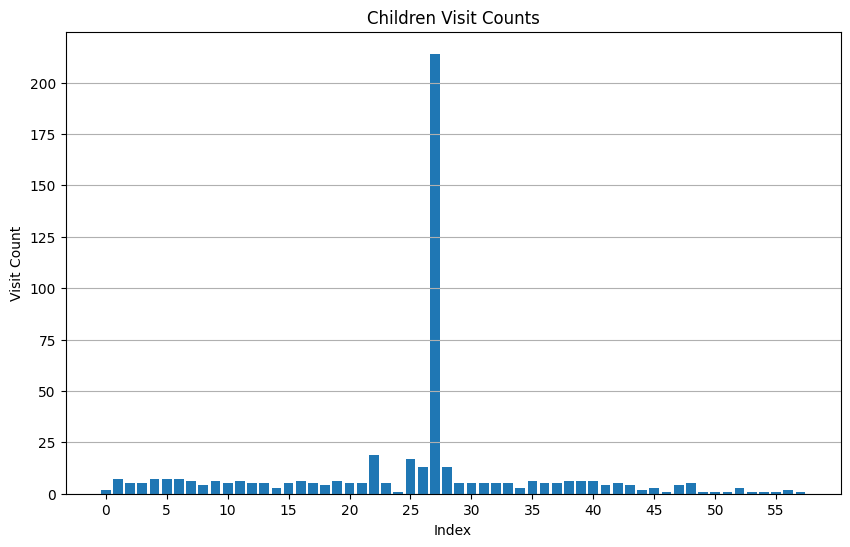

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(reports[0].params["children_visit_counts"])), reports[0].params["children_visit_counts"])
plt.title("Children Visit Counts")
plt.xlabel("Index")
plt.ylabel("Visit Count")
plt.xticks(range(0, len(reports[0].params["children_visit_counts"]), 5))
plt.grid(True, axis='y')
plt.show()


In [ ]:
plt.plot(reports[0].params["children_visit_counts"])